<a href="https://colab.research.google.com/github/cooperp15/SQC/blob/main/SQC_Hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import math
import statistics
import numpy as np
import scipy.stats as st
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SQC HW 3 Data 1.csv to SQC HW 3 Data 1.csv
User uploaded file "SQC HW 3 Data 1.csv" with length 226 bytes


In [ ]:
import pandas as pd
data = pd.read_csv('SQC HW 3 Data 1.csv', sep=',', na_values=".")
data

In [ ]:
# 4.35 part A
# The flow rate does not have a major affect on etch uniformity.

In [ ]:
flow125=data[data['flow']==125]['uniformity']
flow125

In [ ]:
mean1 = flow125.mean()
mean1

In [ ]:
flow160=data[data['flow']==160]['uniformity']
flow160

In [ ]:
mean2 = flow160.mean()
mean2

In [ ]:
flow200=data[data['flow']==200]['uniformity']
flow200

In [ ]:
mean3 = flow200.mean()
mean3

In [78]:
flow125=data[data['flow']==125]['uniformity']
flow160=data[data['flow']==160]['uniformity']
flow200=data[data['flow']==200]['uniformity']

In [ ]:
stat, p=f_oneway(flow125, flow160, flow200)
print('stat=%.3f, p=%.3f' %(stat,p))
if p > 0.5:
  print('Not different distribution')
else:
  print('Different distribution')

In [ ]:
data.info()

In [ ]:
model = ols('uniformity ~ C(flow)', data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

In [ ]:
print(model.summary())

In [ ]:
# 4.35 B 
# 125 has a lower uniformity percentage so thats what we choose

In [ ]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)']
    aov = aov[cols]
    return aov

anova_table(aov_table)

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Percent Uniformity by Flow Rate", fontsize= 20)
ax.set

data1=[flow125, flow160, flow200]

ax.boxplot(data1,
           labels= ['125', '160', '200',],
           showmeans= True)

plt.xlabel("Flow Rate")
plt.ylabel("Percent Uniformity")

plt.show()

In [ ]:
# 4.35 part C

In [ ]:
uniformity_predict=model.predict()
uniformity_predict

In [ ]:
model.rsquared

In [ ]:
model.rsquared_adj

In [ ]:
residuals=model.resid
residuals

In [ ]:
se= model.mse_resid/6
se

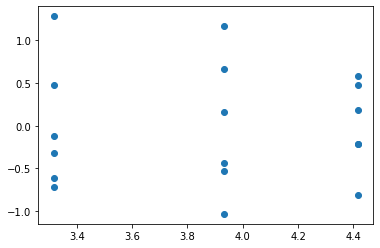

In [91]:
plt.scatter(uniformity_predict, residuals)

plt.show()

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability Plot of Residuals", fontsize= 20)
ax.set

plt.show()

The fat pencil test shows that it is normal which shows that there is not a big difference between the prediction and the residuals.

In [ ]:
# 4.35 D
# The normality assumption does seem reasonable for this problem

In [ ]:
# 4.36

In [102]:
mean1, mean2, mean3

(3.316666666666667, 4.416666666666667, 3.9333333333333336)

In [103]:
resmean2 = 	0.508667
n = 6
scale = math.sqrt(resmean2/n)
scale

0.291166332760732

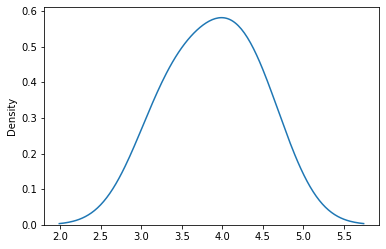

In [106]:
sns.kdeplot((mean1,mean2,mean3))

From the output of the plot, it looks normal and there are no outliers.

In [ ]:
# 4.53

In [157]:
X = 31.400
m = 30
se_mean = .336
z = (X-m)/se_mean
z

4.1666666666666625

In [148]:
st.norm.sf((z))*2

3.09085937645925e-05

In [ ]:
# Since the p-value is low we reject the null hypothesis. This is a one-sided test. 
# The SE mean was calculated by the std divided by the square root of the sample size. 

In [ ]:
# 4.47

In [138]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SQC HW 3 Data 3.csv to SQC HW 3 Data 3 (1).csv
User uploaded file "SQC HW 3 Data 3.csv" with length 232 bytes


In [140]:
import pandas as pd
data3 = pd.read_csv('SQC HW 3 Data 3.csv', sep=',', na_values=".")
data3

,Brake,rpm,Road,Compression
0,225,2000,90,100
1,212,1800,94,95
2,229,2400,88,110
3,222,1900,91,96
4,219,1600,86,100
5,278,2500,96,110
6,246,3000,94,98
7,237,3200,90,100
8,233,2800,88,105
9,224,3400,86,97


In [ ]:
# 4.47 A

In [141]:
Brake = data3['Brake ']
RPM = data3['rpm']
Road = data3['Road']
Compression = data3['Compression']

In [ ]:
model2 = ols('Brake ~ Compression + rpm + Road', data=data3).fit()
aov_table2 = sm.stats.anova_lm(model2, typ=2)
aov_table2

In [ ]:
(print(model2.summary()))

Since there is a low p-value, we reject the null hypothesis.

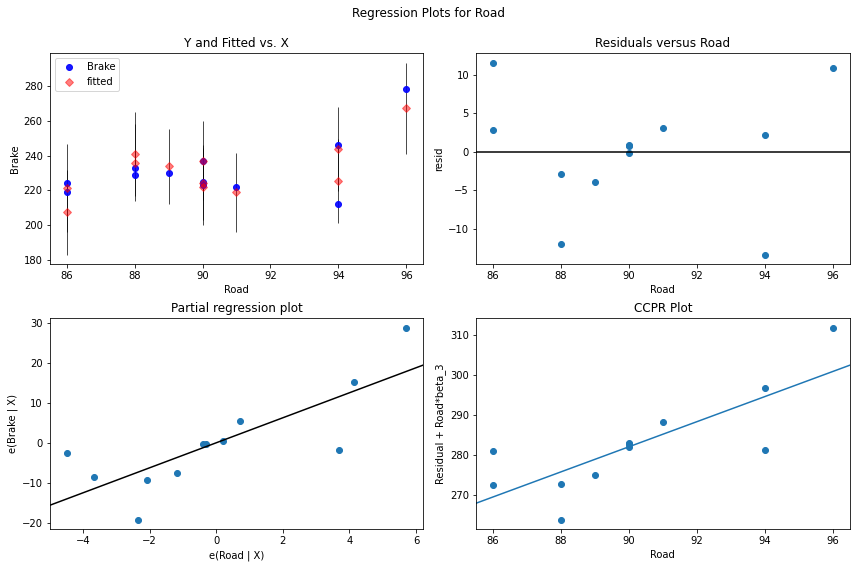

In [159]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'Road', fig=fig)

In [ ]:
# Yes you need all three regressor variables in the model